
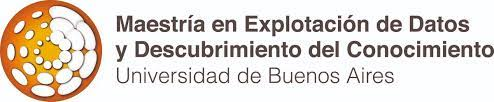

##      **_Data mining en Ciencia y Tecnología_**
#                2do cuatrimestre 2022 

# Procesamiento de imágenes (pre TP1)

In [ ]:
pip install Clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 13.6 MB/s 
     |████████████████████████████████| 88 kB 9.5 MB/s 
     |████████████████████████████████| 1.1 MB 52.2 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cd4d832e2648b7c98e6fa1e77831e1e5efb560490e96ba813c1ce707468c1c76
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7cf646f7e1b89410afabe7e34694c4f0db3c3f0bff0176f87701122e58d3cd52
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=52107289fb2155d8ca85350431a33fbf7590fec6bd331b0ad638b60cdd95856e
  Stored in directory: /root/.cache/pip/whee

In [ ]:
from clustimage import Clustimage
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np

In [ ]:
# Accessing My Google Drive
# Lista de archivos de flores
# from google.colab import drive
# drive.mount('/content/drive')
!gdown --id
image_path = "/content/drive/MyDrive/Colab Notebooks/flower_images/flower_images" #PONER EL PATH DE CADA UNO
#image_path = "drive/My Drive/flower_images/flower_images" #PONER EL PATH DE CADA UNO
#Creo una lista con todos los nombres de las imágenes que se encuentran en la carpeta(png)
path = sorted([os.path.join(image_path, file)
                          for file in os.listdir(image_path )
                          if file.endswith('.png')])

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id


In [ ]:
path[1]

'/content/drive/MyDrive/Colab Notebooks/flower_images/flower_images/0002.png'

## Las  imágenes son básicamente matrices
Mínimo elemento de la matriz se conoce como pixel.
Cada pixel es un dígito está entre (0,255) *(8 bits)*

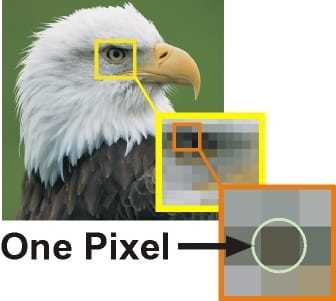


In [ ]:
path[0]


'/content/drive/MyDrive/Colab Notebooks/flower_images/flower_images/0001.png'

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


[19 20 22 ... 49 26 97]


(-0.5, 127.5, 127.5, -0.5)

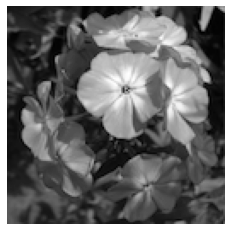

In [ ]:
cl = Clustimage()
img = cl.imread(path[0], dim=(128,128),colorscale=0) #Levanta la imagen
print(img)
len(img)
imagen = img.reshape(128,128)
plt.imshow(imagen,cmap='gray')
plt.axis('off')


Cargar etiquetas

In [ ]:
df_etiquetas=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flower_images/flower_images/flower_labels.csv")

In [ ]:
df_etiquetas

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0
...,...,...
205,0206.png,6
206,0207.png,0
207,0208.png,4
208,0209.png,6


In [ ]:
etiquetas = np.sort(df_etiquetas.label.unique())

etiquetas

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
filtro = df_etiquetas.label == 0
df_etiquetas[filtro].iloc[1,0]

'0002.png'

In [ ]:
etiquetas[1]

1

In [ ]:
/content/drive/MyDrive/Colab Notebooks/flower_images/flower_images/


SyntaxError: ignored

In [ ]:
ej_n = 0
list_file = []
for i in etiquetas:
  filtro_i = df_etiquetas.label == etiquetas[i]
  list_file.append(df_etiquetas[filtro_i].iloc[ej_n,0])

In [ ]:
list_file[0]

'0001.png'

In [ ]:
concant()

In [ ]:
  plt.figure(figsize=(17,8))
  plt.subplot(2,5,i+1)
  plt.title(str(class_names[clase_i])+str([clase_i]))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.array(X_train[filtro_i].iloc[0]).reshape(28,28),cmap='binary')
plt.tight_layout()

In [ ]:
df_etiquetas.loc['label']==0

KeyError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La imagen se trata como un array. Puedo elegir qué parte mostrar

Text(0.5, 0, 'pixel values')

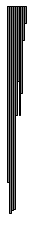

In [ ]:
# Puedo seleccionar una región de la imagen
plt.imshow(imagen[3:30,3:30],cmap='gray')
plt.axis('off')

# Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels 
plt.hist(img,bins=10,color='grey',edgecolor='k')
plt.xlabel('pixel values')


Como cualquier matriz, la imagen se puede rotar o girar 

(-0.5, 127.5, 127.5, -0.5)

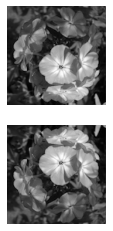

In [ ]:
imagen_rotada = np.flipud(imagen) #Reverse the order of elements along axis 0 (up/down).
plt.subplot(2,1,1)
plt.imshow(imagen_rotada,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(imagen,cmap='gray')
plt.axis('off')

## Para suavizar una imagen o para reducir el ruido se usan filtros sobre las imágenes.

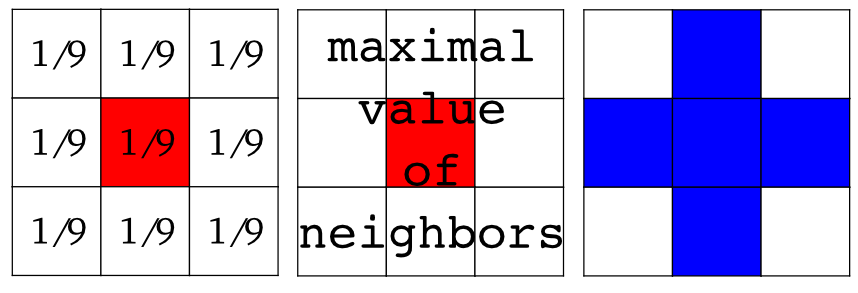


Text(0.5, 1.0, 'Filtrada')

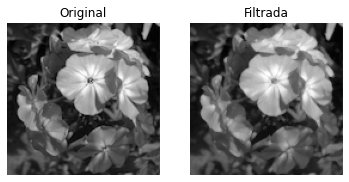

In [ ]:
from   import median_filter
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html
imagen_filtrada = median_filter(imagen,size=2)

plt.subplot(1,2,1)
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.title('Filtrada')

## Las imágenes a color 
1 dimensión más  ⟶ RGB
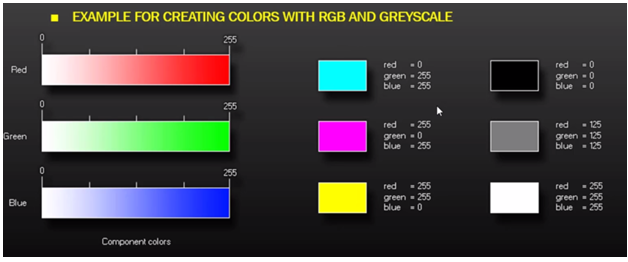

(-0.5, 127.5, 127.5, -0.5)

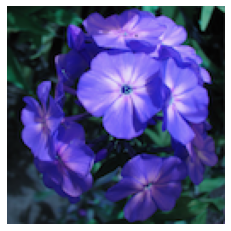

In [ ]:
 img = cl.imread(path[0], dim=(128,128),colorscale=1)
 len(img)
 imagen_color=img.reshape(128,128,3)
 plt.imshow(imagen_color)
 plt.axis('off')

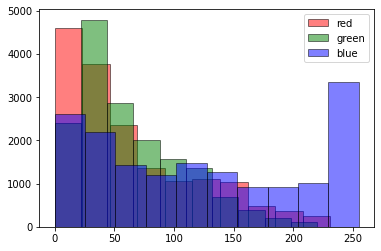

In [ ]:
colores =['red','green','blue']
for n,cs in enumerate(colores):
  monocol=imagen_color[:,:,n]
  plt.hist(monocol.reshape(128*128,1),color=cs,bins=10,edgecolor='k',alpha=0.5,label=cs)
  plt.legend()